In [133]:
# Improt libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
%matplotlib inline

In [134]:
# Import dataset
dataset = pd.read_csv('drug200.csv')

In [135]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [137]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Visualization


In [138]:
sns.set_style("darkgrid")
sns.set_palette("Accent")

### * Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

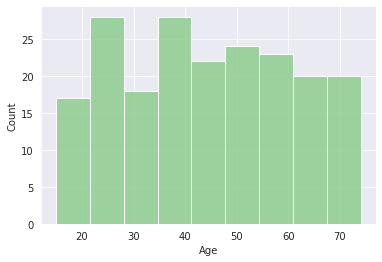

In [139]:
sns.histplot(data=dataset, x='Age')

<AxesSubplot:xlabel='Drug', ylabel='Age'>

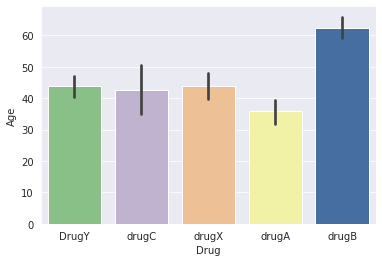

In [140]:
sns.barplot(data = dataset, x = 'Drug', y = 'Age')

<AxesSubplot:xlabel='Drug', ylabel='Age'>

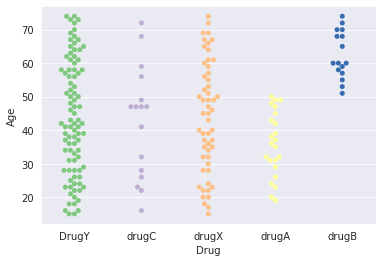

In [141]:
sns.swarmplot(data = dataset, x = 'Drug', y = 'Age')

### * Na_to_K

/home/ehsan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

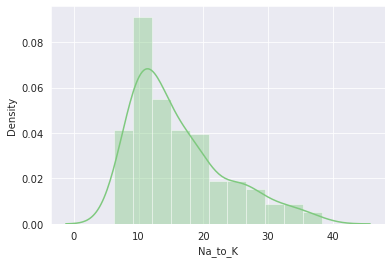

In [142]:
sns.distplot(dataset['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

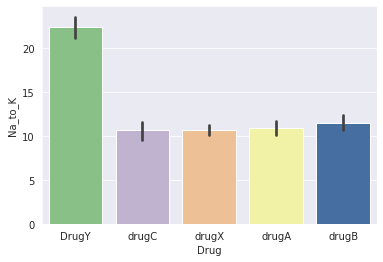

In [143]:
sns.barplot(data = dataset, x = 'Drug', y = 'Na_to_K')

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

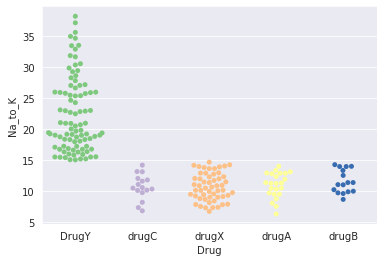

In [144]:
sns.swarmplot(data = dataset, x = 'Drug', y = 'Na_to_K')

### * Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

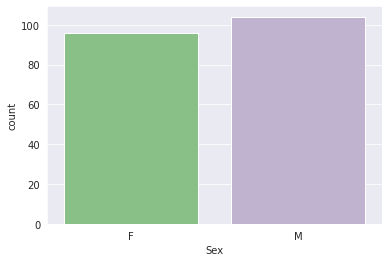

In [145]:

sns.countplot(data = dataset, x='Sex')

<AxesSubplot:xlabel='Drug', ylabel='count'>

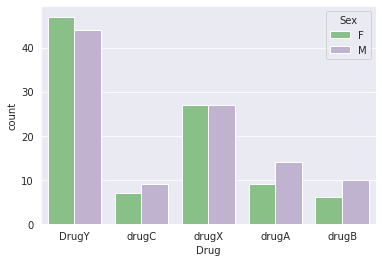

In [146]:
sns.countplot(data = dataset, x = 'Drug', hue = 'Sex')

<AxesSubplot:xlabel='Drug', ylabel='Age'>

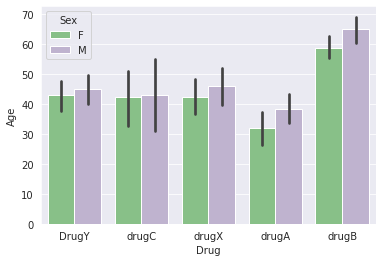

In [147]:
sns.barplot(data=dataset, x = 'Drug', y = 'Age', hue = 'Sex')

### * Cholesterol

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

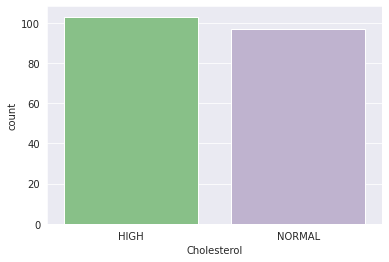

In [148]:

sns.countplot(data = dataset, x = 'Cholesterol')

<AxesSubplot:xlabel='Drug', ylabel='count'>

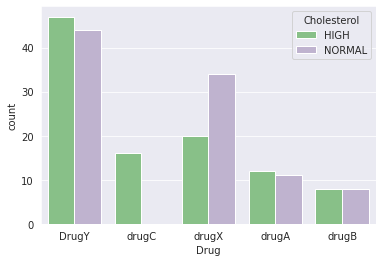

In [149]:
sns.countplot(data = dataset, x = 'Drug', hue = 'Cholesterol')

### * BP

<AxesSubplot:xlabel='BP', ylabel='count'>

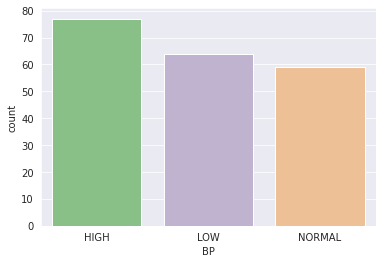

In [150]:
sns.countplot(data=dataset, x = 'BP')

<AxesSubplot:xlabel='Drug', ylabel='count'>

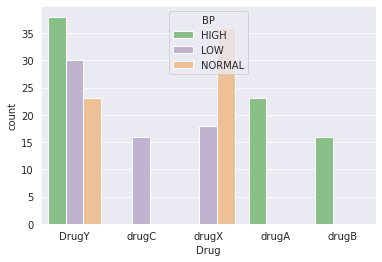

In [151]:
sns.countplot(data = dataset, x = 'Drug', hue = 'BP')

# Preprocessing


### Data Spiliting

In [183]:
from sklearn.model_selection import train_test_split
X = dataset.drop('Drug', axis=1)
y = dataset['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Label Encoding

In [175]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class multi_encoder(BaseEstimator, TransformerMixin):
    def __init__( self, categorical_cols):
        self.cat_cols = categorical_cols

    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X_ = X.copy()
        X_[self.cat_cols] = X_[self.cat_cols].apply(LabelEncoder().fit_transform) 
        return X_


In [180]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

categoric_cols = ['Sex', 'BP', 'Cholesterol']

pipeline = Pipeline([
    ('label encoder', multi_encoder(categoric_cols)),
    ('classifier', RandomForestClassifier())
])

In [181]:
pipeline.fit(X_train, y_train)

/home/ehsan/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



Pipeline(steps=[('label encoder', multi_encoder(categorical_cols=None)),
                ('classifier', RandomForestClassifier())])